In [1]:
import math
import numpy as np

import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 20
mpl.rcParams['font.family'] = 'Times Roman', 'serif'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 24,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt

Matplotbib Version:  3.3.2


In [2]:
def read_energyfile(filename):
    energies = np.loadtxt(filename)
    return energies

def plot(exact_energies,dt,nsteps,nref,energies1,energies2,energies1_evo,energies1_basis,energies2_evo,energies2_basis,cnvg_energies1,cnvg_energies2,elevel):
    ax = plt.subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    plt.rcParams.update({'font.size': 20})
    plt.grid()
    t_nbstates1 = np.linspace(1,cnvg_energies1,cnvg_energies1)
    t_nbstates2 = np.linspace(1,cnvg_energies2,cnvg_energies2)
    plt.plot(t_nbstates1,energies1[:cnvg_energies1,elevel],marker='s',markersize=12,linewidth=3,linestyle='dashed')
    plt.plot(t_nbstates2,energies2[:cnvg_energies2,elevel],marker='v',markersize=12,linewidth=3,linestyle='dashed')
    plt.axhline(y=exact_energies[elevel], color='r', linestyle='-',linewidth=3)
    plt.xlabel('# of Lanczos Basis States')
    plt.ylabel('Energy (MeV)')
    plt.legend(['%s, %s, %s ref state'%(energies1_basis,energies1_evo,str(nref)), '%s, %s, %s ref state'%(energies2_basis,energies2_evo,str(nref)), 'Exact Energy'], loc='upper right', numpoints=1)
    #plt.xlim([0, 1])
    #plt.ylim([math.floor(exact_energies[elevel]), -28])
    plt.rcParams['figure.figsize'] = [12.5, 10]
    if elevel == 0:
        plt.title('Ground State, dt = %s'%str(dt))
    else:
        plt.title('Excited State %s, dt = %s'%(str(elevel),str(dt)))

    plt.savefig('/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Ionel_code/plots/%s%s_%s%s_%selevel_%srefstates_%sdt.png'%(energies1_basis,energies1_evo,energies2_basis,energies2_evo,str(elevel),str(nref),str(dt)), facecolor='white', edgecolor='none', dpi=300, bbox_inches='tight')
    

In [3]:
# Input parameters

dt = 0.1
nsteps = 15
nref = 2
system = "2p2n_pfull"

energies_evo = "trotter" # "trotter" or "exact"
energies_basis = "sph" # "hf" or "sph"

In [32]:
# Import energies from time evolution produced by 'qlanc-real-time' python code

energies = read_energyfile('/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Ionel_code/%s/%s/%s_%s_%srefs_%sdt_%ssteps_%s.txt'%(energies_basis,energies_evo,energies_basis,energies_evo,str(nref),str(dt),str(nsteps),system))

In [33]:
# Load exact energies files produced by 'exact-diag' python code

if (energies_basis == "hf"):
    exact_energies_hf = read_energyfile('exactenergies_hfbasis_%s.txt'%system)
    
if (energies_basis == "sph"):
    exact_energies_sph = read_energyfile('exactenergies_sphbasis_%s.txt'%system)

In [34]:
# Plot results

#plot(exact_energies_hf,dt,nsteps,nref,energies,energies_evo,energies_basis)


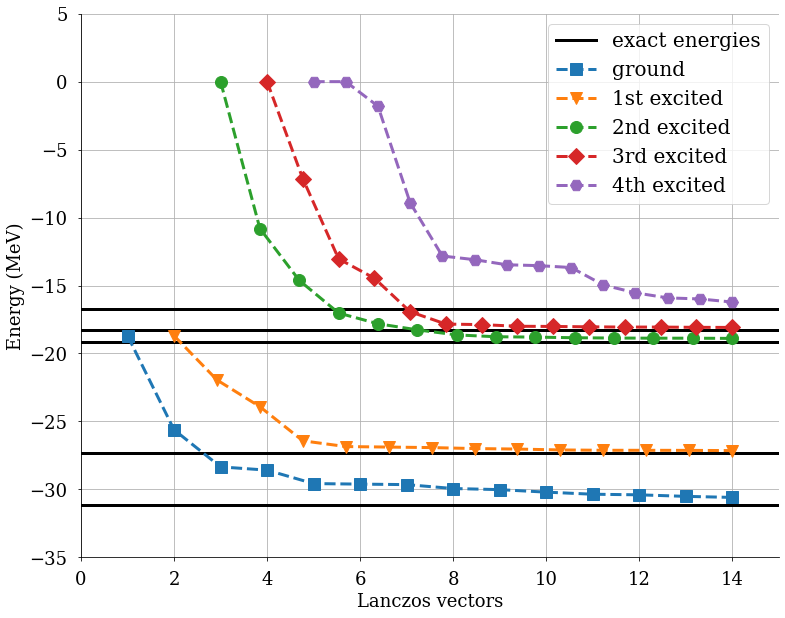

In [35]:
#nbstates1 = np.linspace(1,nsteps-1,nsteps-1)

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.rcParams.update({'font.size': 20})
plt.grid()

#plt.legend(['%s, %s, %s ref state'%(energies1_basis,energies1_evo,str(nref)), '%s, %s, %s ref state'%(energies2_basis,energies2_evo,str(nref)), 'Exact Energy'], loc='upper right', numpoints=1)
plt.axhline(y=exact_energies_hf[0], color='k', linestyle='-',linewidth=3,label='exact energies')
plt.axhline(y=exact_energies_hf[1], color='k', linestyle='-',linewidth=3)
plt.axhline(y=exact_energies_hf[6], color='k', linestyle='-',linewidth=3)
plt.axhline(y=exact_energies_hf[15], color='k', linestyle='-',linewidth=3)
plt.axhline(y=exact_energies_hf[20], color='k', linestyle='-',linewidth=3)    

plt.plot(np.linspace(1,nsteps-1,nsteps-1),energies[:nsteps-1,0],marker='s',markersize=12,linewidth=3,linestyle='dashed',label = 'ground')
plt.plot(np.linspace(2,nsteps-1,nsteps-1),energies[:nsteps-1,1],marker='v',markersize=12,linewidth=3,linestyle='dashed',label='1st excited')
plt.plot(np.linspace(3,nsteps-1,nsteps-1),energies[:nsteps-1,2],marker='o',markersize=12,linewidth=3,linestyle='dashed',label='2nd excited')
plt.plot(np.linspace(4,nsteps-1,nsteps-1),energies[:nsteps-1,3],marker='D',markersize=12,linewidth=3,linestyle='dashed',label='3rd excited')
plt.plot(np.linspace(5,nsteps-1,nsteps-1),energies[:nsteps-1,4],marker='H',markersize=12,linewidth=3,linestyle='dashed',label='4th excited')

plt.legend()
#plt.legend(['exact states','ground', '1st excited', '2nd excited','3rd excited','4th excited'], loc='upper right', numpoints=1)
plt.xlabel('Lanczos vectors')
plt.ylabel('Energy (MeV)')
plt.rcParams['figure.figsize'] = [12.5, 10]
plt.xlim([0, 15])
plt.ylim([-35, 5])
#plt.axhline(y=exact_energies[elevel], color='r', linestyle='-',linewidth=3)

plt.savefig('/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Ionel_code/plots/spectrum_%s%s_%srefstates_%sdt.png'%(energies_basis,energies_evo,str(nref),str(dt)), facecolor='white', edgecolor='none', dpi=300, bbox_inches='tight')
    